# Summary

Plots to put in my qualifying exam.

----

# Imports

In [42]:
%run _imports.ipynb

Setting the PACKAGE_VERSION environment variable.
Setting the DOCS_SECRET_KEY environment variable.
Setting the PYTHON_VERSION environment variable.
Setting the SPARK_MASTER environment variable.
Setting the SPARK_ARGS environment variable.
Setting the DB_TYPE environment variable.
Setting the DB_PORT environment variable.


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2018-05-02 22:18:36.327250


In [39]:
import torch
from sklearn import metrics
from PIL import Image
from tensorboard.backend.event_processing import event_accumulator

In [ ]:
import ipywidgets as widgets
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable
from IPython.display import display, update_display


In [3]:
import pagnn
pagnn.settings.CUDA = False

# Parameters

In [4]:
NOTEBOOK_NAME = 'figures_for_qualifying_exam'
NOTEBOOK_PATH = Path(NOTEBOOK_NAME).resolve()
NOTEBOOK_PATH.mkdir(exist_ok=True)

In [5]:
MODELS_PATH = (
    NOTEBOOK_PATH.parent / 
    'train_neural_network' / 
    'train_classifier-permute-seq-0-9f2f3c506cfc5f7f56c2e292604f7925' /
    'models'
)

# Training curves

## Classifier (DCN)

In [209]:
dcn_12filters_file = next(
    Path(
        'train_neural_network/'
        'train_classifier-permute-seq-0-9f2f3c506cfc5f7f56c2e292604f7925/'
        'tensorboard/'
    ).glob('events.out.*')
)
dcn_12filters_file

PosixPath('train_neural_network/train_classifier-permute-seq-0-9f2f3c506cfc5f7f56c2e292604f7925/tensorboard/events.out.tfevents.1518199598.beagle42')

In [210]:
dcn_64filters_file = next(
    Path(
        'train_neural_network/'
        'train_classifier-permute-seq-0-28ee60f75f25eeea3ecaea634282002b-test_999/'
        'tensorboard/'
    ).glob('events.out.*')
)
dcn_64filters_file

PosixPath('train_neural_network/train_classifier-permute-seq-0-28ee60f75f25eeea3ecaea634282002b-test_999/tensorboard/events.out.tfevents.1519866391.beagle42')

In [211]:
scalars = {}

for tensorboard_file in [dcn_12filters_file, dcn_64filters_file]:

    ea = event_accumulator.EventAccumulator(
        tensorboard_file.as_posix(),
        size_guidance={
            'images': 0,
            'scalars': 0,
        },
    )
    ea.Reload()

    scalars[tensorboard_file.parent.parent.name] = {
        name.replace('checkpoins', 'checkpoints'): pd.DataFrame(ea.Scalars(name))
        for name in ea.Tags()['scalars']
    }

In [229]:
scalars[dcn_12filters_file.parent.parent.name].keys()

dict_keys(['validation_exact_80_10000-seq', 'validation_exact_80_10000-adj', 'validation_exact_80_10000-zzz', 'validation_protherm-spearman_r', 'validation_humsavar-auc', 'num_aa_processed', 'training', 'sequences_per_second'])

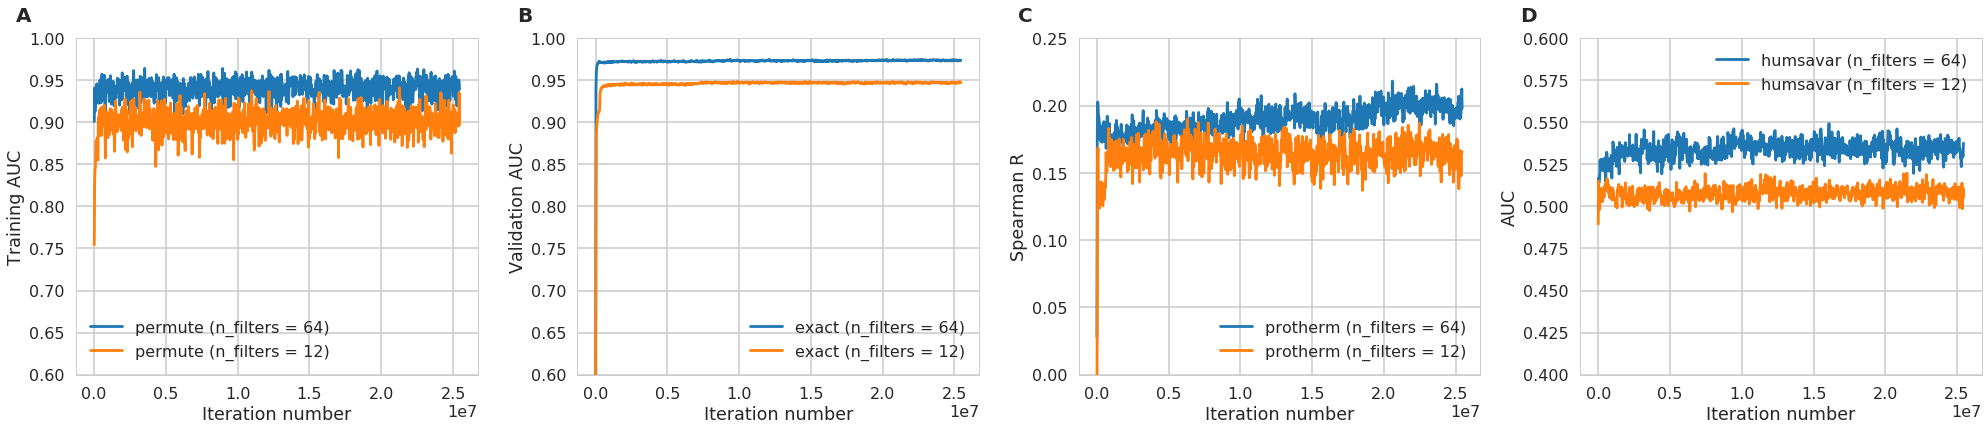

In [254]:
fg, axs = plt.subplots(1, 4, figsize=(28, 6))

# steps = set(dfs['validation_gan_exact_80_1000-auc']['step'])

# Pos / Neg / Gen prediction scores
i = 0
ax = axs[0]
plt.sca(ax)
for name, label in [
    ('training', 'permute'),
#     ('gen_preds-mean', 'Generated sequence 2'),
]:
    df = scalars[dcn_64filters_file.parent.parent.name][name]
    plt.plot(df['step'], df['value'], label=label + ' (n_filters = 64)')

    df = scalars[dcn_12filters_file.parent.parent.name][name]
    df = df[df['step'] <= 25446400]
    plt.plot(df['step'], df['value'], label=label + ' (n_filters = 12)')


plt.ylim(0.6, 1)
# plt.title(scalar)
plt.xlabel("Iteration number")
plt.ylabel("Training AUC")
plt.text(-0.15, 1.05, string.ascii_uppercase[i], transform=ax.transAxes, size=20, weight='bold')
plt.legend()


# Pos / Neg / Gen prediction scores
i = 1
ax = axs[1]
plt.sca(ax)
for name, label in [
    ('validation_exact_80_10000-seq', 'exact'),
#     ('validation_exact_80_10000-adj', 'exact (adj)'),
#     ('validation_exact_80_10000-zzz', 'exact (negative control)'),
]:
    df = scalars[dcn_64filters_file.parent.parent.name][name]
    plt.plot(df['step'], df['value'], label=label + ' (n_filters = 64)')

    df = scalars[dcn_12filters_file.parent.parent.name][name]
    df = df[df['step'] <= 25446400]
    plt.plot(df['step'], df['value'], label=label + ' (n_filters = 12)')
plt.ylim(0.6, 1)
# plt.title(scalar)
plt.xlabel("Iteration number")
plt.ylabel("Validation AUC")
plt.text(-0.15, 1.05, string.ascii_uppercase[i], transform=ax.transAxes, size=20, weight='bold')
plt.legend()



# Pos / Neg / Gen prediction scores
i = 2
ax = axs[2]
plt.sca(ax)
for name, label in [
    ('validation_protherm-spearman_r', 'protherm'),
]:
    df = scalars[dcn_64filters_file.parent.parent.name][name]
    plt.plot(df['step'], df['value'], label=label + ' (n_filters = 64)')

    df = scalars[dcn_12filters_file.parent.parent.name][name]
    df = df[df['step'] <= 25446400]
    plt.plot(df['step'], df['value'], label=label + ' (n_filters = 12)')
plt.ylim(0, 0.25)
# plt.title(scalar)
plt.xlabel("Iteration number")
plt.ylabel("Spearman R")
plt.text(-0.15, 1.05, string.ascii_uppercase[i], transform=ax.transAxes, size=20, weight='bold')
plt.legend()


# Pos / Neg / Gen prediction scores
i = 3
ax = axs[3]
plt.sca(ax)
for name, label in [
    ('validation_humsavar-auc', 'humsavar'),
]:
    df = scalars[dcn_64filters_file.parent.parent.name][name]
    plt.plot(df['step'], df['value'], label=label + ' (n_filters = 64)')

    df = scalars[dcn_12filters_file.parent.parent.name][name]
    df = df[df['step'] <= 25446400]
    plt.plot(df['step'], df['value'], label=label + ' (n_filters = 12)')
plt.ylim(0.4, 0.6)
# plt.title(scalar)
plt.xlabel("Iteration number")
plt.ylabel("AUC")
plt.text(-0.15, 1.05, string.ascii_uppercase[i], transform=ax.transAxes, size=20, weight='bold')
plt.legend()

plt.tight_layout()
plt.savefig(NOTEBOOK_PATH.joinpath('dcn_training_curves.png'), dpi=300, bbox_inches='tight')
plt.savefig(NOTEBOOK_PATH.joinpath('dcn_training_curves.pdf'), bbox_inches='tight')

## GAN

### Tensorboard data

In [40]:
tensorboard_files = sorted(
    Path(
        'train_neural_network/'
        'permute-seq-0-test_x14-0.1.9.dev-4a07eef/'
        'tensorboard/'
    ).glob('events.out.*')
)
tensorboard_files

[PosixPath('train_neural_network/permute-seq-0-test_x14-0.1.9.dev-4a07eef/tensorboard/events.out.tfevents.1524611430.beagle42')]

In [43]:
SCALARS = {}
IMAGES = {}

for tensorboard_file in tensorboard_files:
    ea = event_accumulator.EventAccumulator(
        tensorboard_file.as_posix(),
        size_guidance={
            'images': 0,
            'scalars': 0,
        },
    )
    ea.Reload()
    
    SCALARS[tensorboard_file.parent.parent.name] = {
        name.replace('checkpoins', 'checkpoints'): pd.DataFrame(ea.Scalars(name))
        for name in ea.Tags()['scalars']
    }

    IMAGES[tensorboard_file.parent.parent.name] = {
        name: [Image.open(io.BytesIO(img.encoded_image_string)) for img in ea.Images(name)]
        for name in ea.Tags()['images']
    }
    
    del ea

In [44]:
print(tensorboard_file.parent.parent.name)

SCALARS[tensorboard_file.parent.parent.name]['blosum62_scores-mean'].head()

permute-seq-0-test_x14-0.1.9.dev-4a07eef


,wall_time,step,value
0,1.524612e+09,0,-1.162559
1,1.524612e+09,204,-1.297776
2,1.524613e+09,418,-1.291102
3,1.524613e+09,641,-1.290255
4,1.524614e+09,871,-1.287011


### Recalculated data

In [135]:
data = []

for row in dfs['validation_gan_exact_80_1000-auc'][['step']].itertuples():
    with (NOTEBOOK_PATH.parent / 
          f'validate_trained_network' / 
          f'all_scores_{row.Index}.pickle').open('rb') as fin:
        data.append([row.Index, row.step] + pickle.load(fin))

In [136]:
df_recalc = pd.DataFrame(data, columns=['', 'step', 'data']).set_index('')

In [137]:
dfs_recalc = {}

for key in [
    ('evaluate_validation_dataset', 1),
    ('evaluate_validation_dataset', 64),
    ('evaluate_mutation_dataset', 1),
    ('evaluate_mutation_dataset', 64)
]:
    LD = df_rerun['data'].apply(lambda d: d[key])
    DL = dict(zip(LD[0],zip(*[d.values() for d in LD])))
    df = pd.DataFrame(DL, index=range(len(LD)))
    df['step'] = df_rerun['step']
    dfs_recalc[key] = df

In [138]:
dfs_recalc[('evaluate_validation_dataset', 64)].head()

,edges-auc,edges-outputs-mean,edges-targets-mean,exact-auc,exact-outputs-mean,exact-targets-mean,humsavar-auc,humsavar-outputs-mean,humsavar-targets-mean,middle-auc,middle-outputs-mean,middle-targets-mean,permute-auc,permute-outputs-mean,permute-targets-mean,protherm-outputs-mean,protherm-spearman_corr,protherm-targets-mean,start-auc,start-outputs-mean,start-targets-mean,stop-auc,stop-outputs-mean,stop-targets-mean,step
0,0.981591,0.485555,0.5,0.993468,0.561681,0.5,0.500531,0.767301,0.758616,0.988802,0.418339,0.5,0.989484,0.417516,0.5,0.954796,-0.006830,1.072999,0.985354,0.433260,0.5,0.962841,0.503678,0.5,0
1,0.994551,0.485440,0.5,0.996987,0.532075,0.5,0.493287,0.893874,0.758616,0.999789,0.461732,0.5,0.998668,0.441905,0.5,0.989078,0.018978,1.072999,0.999441,0.437901,0.5,0.982138,0.481769,0.5,204
2,1.000000,0.497951,0.5,1.000000,0.499419,0.5,0.526446,0.987011,0.758616,1.000000,0.497002,0.5,1.000000,0.494167,0.5,0.999778,0.005699,1.072999,1.000000,0.497954,0.5,1.000000,0.491577,0.5,418
3,0.996645,0.393472,0.5,0.999846,0.443080,0.5,0.493292,0.764850,0.758616,0.999756,0.353149,0.5,0.999601,0.342835,0.5,0.872593,0.023072,1.072999,0.999455,0.369519,0.5,0.996639,0.402609,0.5,641
4,1.000000,0.499157,0.5,1.000000,0.499744,0.5,0.518550,0.929098,0.758616,1.000000,0.495935,0.5,1.000000,0.493288,0.5,0.998962,-0.011412,1.072999,1.000000,0.498313,0.5,1.000000,0.491820,0.5,871


### Figures

In [139]:
sns.set_context('poster')

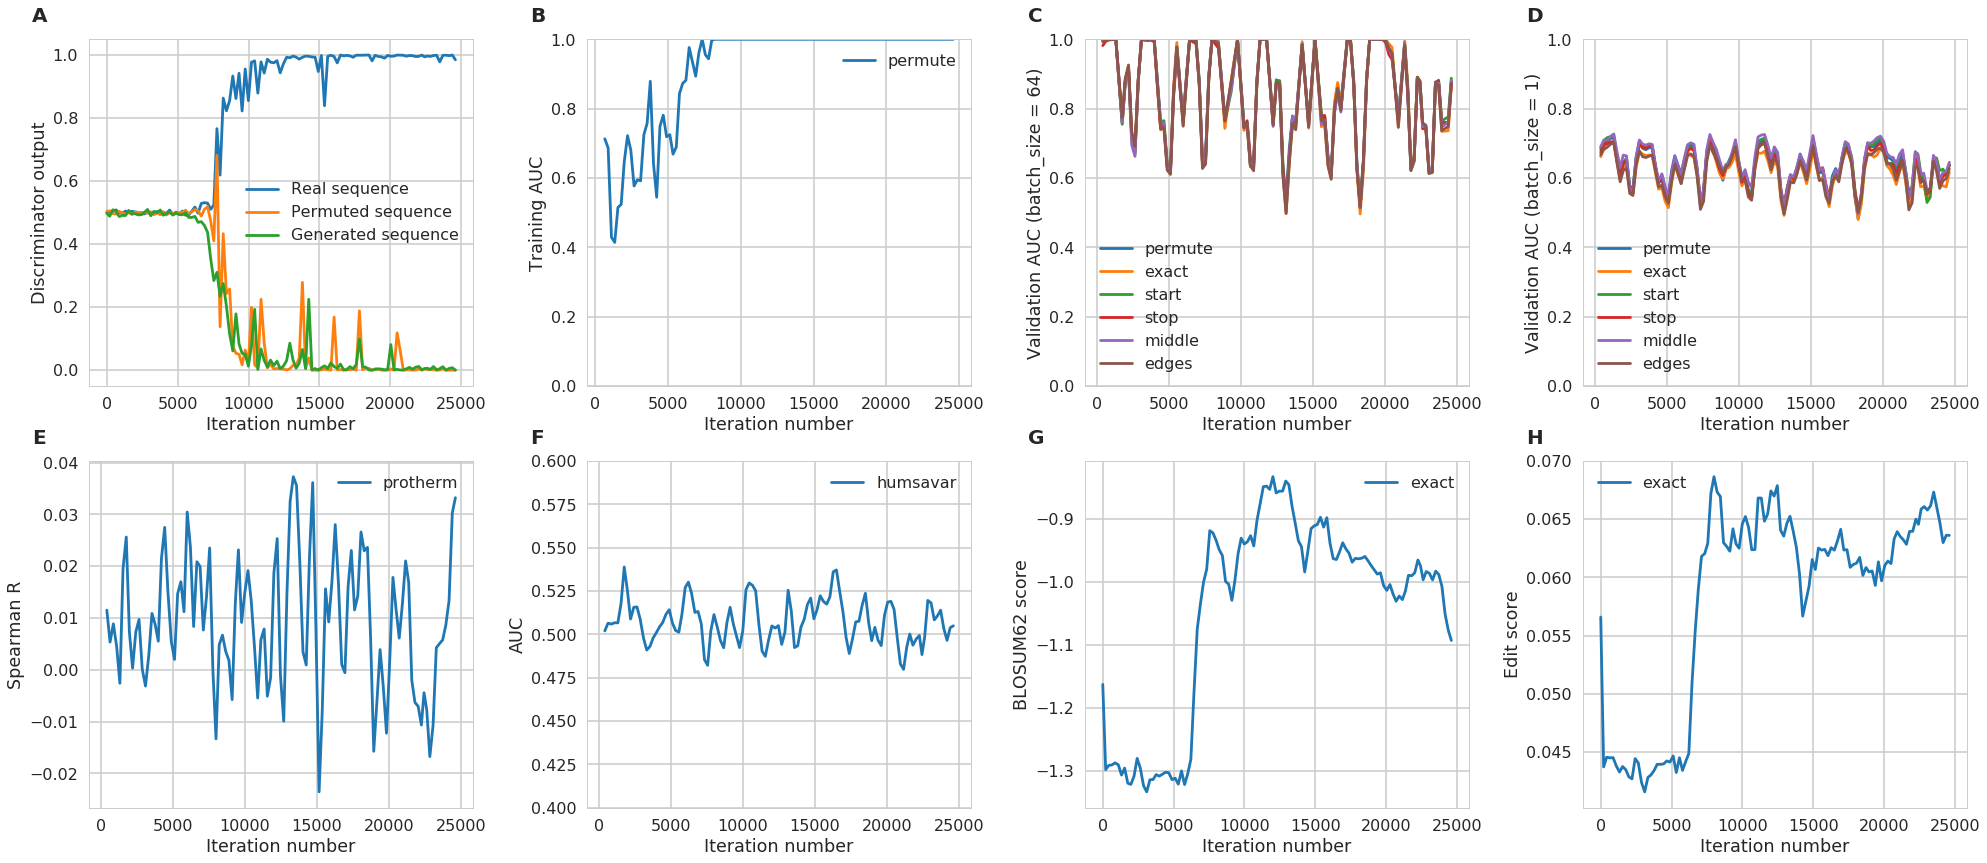

In [205]:
fg, axs = plt.subplots(2, 4, figsize=(28, 12))

dfs = SCALARS[tensorboard_file.parent.parent.name]
steps = set(dfs['validation_gan_exact_80_1000-auc']['step'])

# Pos / Neg / Gen prediction scores
i = 0
ax = axs[0, 0]
plt.sca(ax)
for name, label in [
    ('pos_preds-mean', 'Real sequence'),
    ('neg_preds-mean', 'Permuted sequence'),
    ('fake_preds-mean', 'Generated sequence'),
#     ('gen_preds-mean', 'Generated sequence 2'),
]:
    df = dfs[name]
    df = df[df['step'].isin(steps)]
    plt.plot(df['step'], df['value'], label=label)
# plt.ylim(, y_max)
# plt.title(scalar)
plt.xlabel("Iteration number")
plt.ylabel("Discriminator output")
plt.text(-0.15, 1.05, string.ascii_uppercase[i], transform=ax.transAxes, size=20, weight='bold')
plt.legend()


# Training AUC
i = 1
ax = axs[0, 1]
plt.sca(ax)
for name, label in [
    ('training_pos-auc', 'permute'),
]:
    df = dfs[name]
    df['value_rolling'] = df['value'].rolling(3 * len(df) // len(steps), win_type='triang').mean()
    df = df[df['step'].isin(steps)]
    plt.plot(df['step'], df['value_rolling'], label=label)
plt.ylim(0, 1)
plt.xlabel("Iteration number")
plt.ylabel("Training AUC")
plt.text(-0.15, 1.05, string.ascii_uppercase[i], transform=ax.transAxes, size=20, weight='bold')
plt.legend()


# Validation AUC
i = 2
ax = axs[0, 2]
plt.sca(ax)
df = dfs_recalc[('evaluate_validation_dataset', 64)]
df = df[df['step'].isin(steps)]
assert len(df) == len(steps)
for name, label in [
    ('permute-auc', 'permute'),
    ('exact-auc', 'exact'),
    ('start-auc', 'start'),
    ('stop-auc', 'stop'),
    ('middle-auc', 'middle'),
    ('edges-auc', 'edges'),
]:
    df['value_rolling'] = df[name].rolling(3, win_type='triang').mean()
    plt.plot(df['step'], df['value_rolling'], label=label)
plt.ylim(0, 1)
plt.xlabel("Iteration number")
plt.ylabel("Validation AUC (batch_size = 64)")
plt.text(-0.15, 1.05, string.ascii_uppercase[i], transform=ax.transAxes, size=20, weight='bold')
plt.legend()


# Validation AUC
i = 3
ax = axs[0, 3]
plt.sca(ax)
df = dfs_recalc[('evaluate_validation_dataset', 1)]
df = df[df['step'].isin(steps)]
assert len(df) == len(steps)
for name, label in [
    ('permute-auc', 'permute'),
    ('exact-auc', 'exact'),
    ('start-auc', 'start'),
    ('stop-auc', 'stop'),
    ('middle-auc', 'middle'),
    ('edges-auc', 'edges'),
]:
    df['value_rolling'] = df[name].rolling(3, win_type='triang').mean()
    plt.plot(df['step'], df['value_rolling'], label=label)
plt.ylim(0, 1)
plt.xlabel("Iteration number")
plt.ylabel("Validation AUC (batch_size = 1)")
plt.text(-0.15, 1.05, string.ascii_uppercase[i], transform=ax.transAxes, size=20, weight='bold')
plt.legend()


# # Validation AUC
# plt.sca(axs[0, 3])
# for name, label in [
#     ('validation_gan_permute_80_1000-auc', 'permute'),
#     ('validation_gan_exact_80_1000-auc', 'exact'),
#     ('validation_gan_start_80_1000-auc', 'start'),
#     ('validation_gan_stop_80_1000-auc', 'stop'),
#     ('validation_gan_middle_80_1000-auc', 'middle'),
#     ('validation_gan_edges_80_1000-auc', 'edges'),
# ]:
#     df = dfs[name]
#     df = df[df['step'].isin(steps)]
#     plt.plot(df['step'], df['value'], label=label)
# plt.ylim(0, 1)
# # plt.title(scalar)
# plt.xlabel("Iteration number")
# plt.ylabel("Discriminator output")
# plt.legend()


# === External validation ===

# Protherm
i = 4
ax = axs[1, 0]
plt.sca(ax)
df = dfs_recalc[('evaluate_mutation_dataset', 64)]
df = df[df['step'].isin(steps)]
assert len(df) == len(steps)
for name, label in [
    ('protherm-spearman_corr', 'protherm'),
]:
    df['value_rolling'] = df[name].rolling(3, win_type='triang').mean()
    plt.plot(df['step'], df['value_rolling'], label=label)
plt.xlabel("Iteration number")
plt.ylabel("Spearman R")
plt.text(-0.15, 1.05, string.ascii_uppercase[i], transform=ax.transAxes, size=20, weight='bold')
plt.legend()


# Humsavar
i = 5
ax = axs[1, 1]
plt.sca(ax)
df = dfs_recalc[('evaluate_mutation_dataset', 64)]
df = df[df['step'].isin(steps)]
assert len(df) == len(steps)
for name, label in [
    ('humsavar-auc', 'humsavar'),
]:
    df['value_rolling'] = df[name].rolling(3, win_type='triang').mean()
    plt.plot(df['step'], df['value_rolling'], label=label)
plt.ylim(0.4, 0.6)
plt.xlabel("Iteration number")
plt.ylabel("AUC")
plt.text(-0.15, 1.05, string.ascii_uppercase[i], transform=ax.transAxes, size=20, weight='bold')
plt.legend()


# BLOSUM62 score
i = 6
ax = axs[1, 2]
plt.sca(ax)
for name, label in [
    ('blosum62_scores-mean', 'exact'),
]:
    df = dfs[name]
    df = df[df['step'].isin(steps)]
    plt.plot(df['step'], df['value'], label=label)
# plt.ylim(, y_max)
# plt.title(scalar)
plt.xlabel("Iteration number")
plt.ylabel("BLOSUM62 score")
plt.text(-0.15, 1.05, string.ascii_uppercase[i], transform=ax.transAxes, size=20, weight='bold')
plt.legend()


# Edit score
i = 7
ax = axs[1, 3]
plt.sca(ax)
for name, label in [
    ('edit_scores-mean', 'exact'),
]:
    df = dfs[name]
    df = df[df['step'].isin(steps)]
    plt.plot(df['step'], df['value'], label=label)
# plt.ylim(, y_max)
# plt.title(scalar)
plt.xlabel("Iteration number")
plt.ylabel("Edit score")
plt.text(-0.15, 1.05, string.ascii_uppercase[i], transform=ax.transAxes, size=20, weight='bold')
plt.legend()

plt.tight_layout()
plt.savefig(NOTEBOOK_PATH.joinpath('gan_training_curves.png'), dpi=300, bbox_inches='tight')
plt.savefig(NOTEBOOK_PATH.joinpath('gan_training_curves.pdf'), bbox_inches='tight')

# Load data

## `models_df`

In [256]:
model_files = os.listdir(MODELS_PATH)

In [257]:
models_df = pd.DataFrame(model_files, columns=['model_file'])

display(models_df.head(2))
print(len(models_df))

,model_file
0,step-40115200.model
1,step-89497600.model


4457


In [258]:
models_df['step'] = models_df['model_file'].str.extract('step-(\d*).model', expand=True).astype(int)

In [259]:
display(models_df.head(2))
print(len(models_df))

,model_file,step
0,step-40115200.model,40115200
1,step-89497600.model,89497600


4457


In [260]:
models_df = models_df.sort_values('step')

In [261]:
models_df.tail()

,model_file,step
4170,step-113971200.model,113971200
3733,step-113996800.model,113996800
1273,step-114022400.model,114022400
481,step-114048000.model,114048000
2617,step-114073600.model,114073600


# Classifier (DCN)

## Load network

In [286]:
net = pagnn.models.Classifier(12)

In [287]:
net.load_state_dict(
    torch.load(
        MODELS_PATH.joinpath('step-26547200.model'),
        map_location=lambda storage, loc: storage)
)

## Experimental vs. predicted ΔΔG

In [288]:
protherm_datagen = pagnn.training.dcn.get_mutation_datagen('protherm', NOTEBOOK_PATH.parent)

In [289]:
targets, outputs = pagnn.training.dcn.evaluate_mutation_dataset(net, protherm_datagen)

In [290]:
data = OrderedDict([
    ('ddg_exp', targets.squeeze()),
    ('ddg_pred', -outputs.squeeze()),
    ('mutation', [ds[0][0].meta['mutation'] for ds in protherm_datagen()]),
])

protherm_df = pd.DataFrame(data)

Text(0,0.5,'Number of mutations')

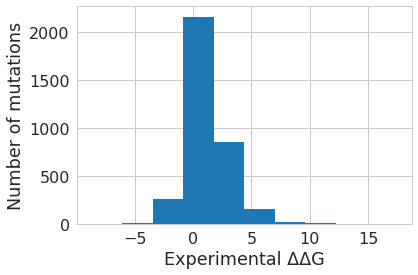

In [291]:
plt.hist(protherm_df['ddg_exp'])
plt.xlabel('Experimental ΔΔG')
plt.ylabel('Number of mutations')

In [292]:
sp.stats.spearmanr(protherm_df['ddg_exp'].values, protherm_df['ddg_pred'].values)

SpearmanrResult(correlation=0.14869446655911017, pvalue=1.2945637209048825e-18)

Text(0,0.5,'ΔΔG pred')

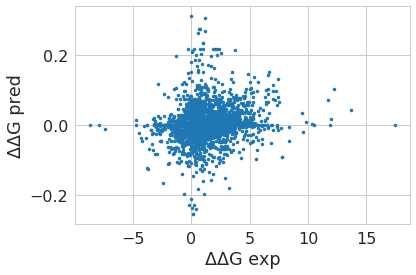

In [293]:
spearman_corr = sp.stats.spearmanr(protherm_df['ddg_exp'].values, protherm_df['ddg_pred'].values)

plt.plot(protherm_df['ddg_exp'].values, protherm_df['ddg_pred'].values, '.')
plt.xlabel('ΔΔG exp')
plt.ylabel('ΔΔG pred')

## Convolution heatmaps

In [294]:
df = pd.DataFrame(net.spatial_conv.weight[0].data.numpy(), columns=[0, 1], index=pagnn.AMINO_ACIDS)
df.head()

,0,1
G,0.019886,-0.398596
V,0.071758,-0.220044
A,0.076630,-0.364096
L,0.027773,-0.552493
I,-0.056125,-0.314105


In [295]:
df2 = df.reset_index().melt(id_vars=['index'], value_vars=[0, 1]).head()
df2.head()

,index,variable,value
0,G,0,0.019886
1,V,0,0.071758
2,A,0,0.076630
3,L,0,0.027773
4,I,0,-0.056125


In [296]:
sns.set_context('notebook', font_scale=1.6)

In [297]:
# plt.rcParams.update({'legend.fontsize': 8.0, 'legend.handlelength': 1})

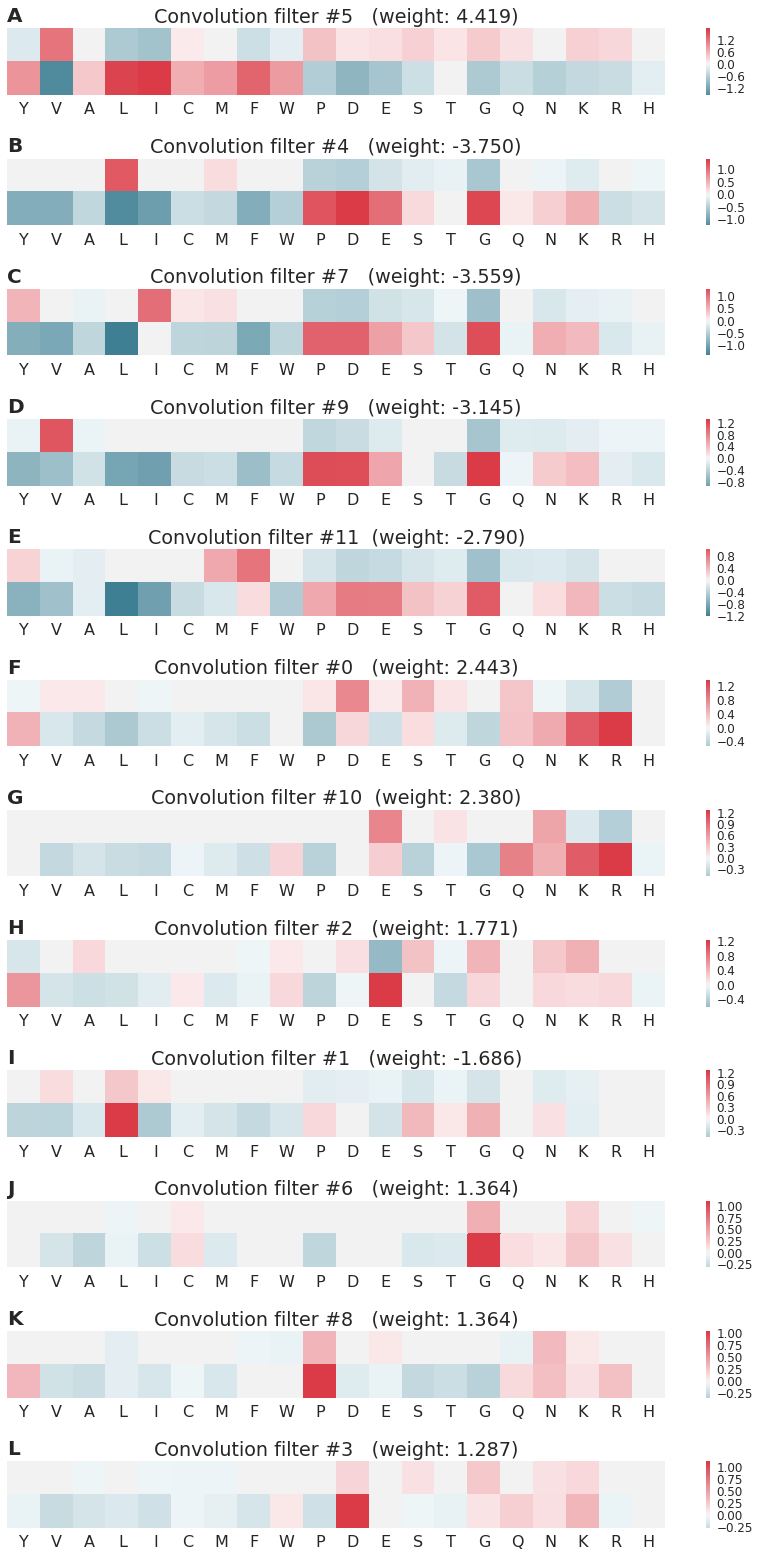

In [306]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# cmap = sns.color_palette("Blues")

filter_weights = net.combine_weights.weight.data.numpy().reshape(-1)
filter_idxs = np.argsort(np.abs(filter_weights))[::-1].tolist()

fg, axs = plt.subplots(len(filter_idxs), 1, figsize=(12, 22))

amino_acids = pagnn.AMINO_ACIDS[:]
# NOTE: Make sure these reversals are accounted for!
amino_acids[0], amino_acids[14] = amino_acids[14], amino_acids[0]

for i, filter_idx in enumerate(filter_idxs):
    ax = axs[i]
    plt.sca(ax)
    plt.text(0, 1.10, string.ascii_uppercase[i], transform=ax.transAxes, size=20, weight='bold')
    filter_weight = filter_weights[filter_idx]
    data_mat = net.spatial_conv.weight[filter_idx].data.numpy().T.copy()
    temp = data_mat[:, 0].copy()
    data_mat[:, 0] = data_mat[:, 14]
    data_mat[:, 14] = temp
    out = sns.heatmap(
        data_mat,
        xticklabels=amino_acids,
        yticklabels=['', ''],
        cmap=cmap,
        center=0)
    cbar_ax = out.figure.axes[-1]
    plt.setp(cbar_ax.get_yticklabels(), fontsize=12)
    plt.title(f"Convolution filter #{filter_idx}\t(weight: {filter_weight:.3f})".expandtabs())
    
plt.tight_layout()

plt.savefig(NOTEBOOK_PATH.joinpath('convolution_filters.png'), dpi=300, bbox_inches='tight')
plt.savefig(NOTEBOOK_PATH.joinpath('convolution_filters.pdf'), dpi=300, bbox_inches='tight')